<a href="https://colab.research.google.com/github/Sanddeep-K/Capstone_1_EDA_Play_Store_App_Review/blob/main/Sandeep_K_Capstone_1_EDA_Play_Store_App_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : EDA of Play Store App Reviews**

-----
-----

## <b> Problem Description </b>

The Play Store apps data has enormous potential to drive app-making businesses to success.

New app maker company want to build a successful Mobile App, which should be accepted by huge customer base of Play Store and creatre a positive Brand Image among customers.

This company has given this assignment to me and asked me to have a detailed EDA of given Play Store Data and submit a report to the Management with my Recommendations on below,

1. Most Successful Genres, Categories & Apps on the Play Store
2. Customer Segment wise most preferred App Categories
3. Most reviewed and positively endorsed Genres / Categories & Apps
4. Important factors leads to the success of Mobile App
5. Technology, Specifications & Support requirements
6. Things to be avoided by App Makers
7. Actionable insights for the developers to work on and capture the Android market.

# **Let's Start**

-----
-----

### First of all, let's mount the drive and import libraries those are required throughout the course of our analysis.
-----

In [180]:
# Let's mount Google Drive first

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Let's import required libraries to process data analysis and visualization
-------

In [181]:
import pandas as pd                                                             # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                                                              # linear algebra
from matplotlib import pyplot as plt                                            # visualization tool
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns                                                           # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly                                                                   # visualization tool
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go                                                  # visualization tool

import plotly.express as px

import plotly.io as iplot
iplot.renderers.default = 'colab'                                               # for visualization google colab

import warnings
warnings.filterwarnings('ignore')

## **Importing Datasets**

-----
-----

In [182]:
# Loading the file path and datasets for analysis.
data_path = ('/content/drive/MyDrive/Colab Notebooks/Capstone_Project_1/Play_Store_App_Data/Play Store Data.csv')
reviews_path = ('/content/drive/MyDrive/Colab Notebooks/Capstone_Project_1/Play_Store_App_Data/User Reviews.csv')

psa_data_df = pd.read_csv(data_path)
reviews_df = pd.read_csv(reviews_path)

## **Exploring Dataset - 1**

----------
-----

### Play Store App Data
-----

In [183]:
## Let's have a glance over the number of rows and columns in our dataset

shape = psa_data_df.shape
print("The data set contains {} Records.\nNumber of features are: {}. ".format(shape[0],(shape[1])))

The data set contains 10841 Records.
Number of features are: 13. 


In [184]:
# Let's have a glance on first five rows of our dataset
psa_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [185]:
## Let's have a glance at last five rows of our dataset
psa_data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Columns Description : Play Store App Data.
-----

1.  **App :** This column consist of the names of the Mobile Apps.
2.   **Category :** This column consist of the category of the Mobile Apps.
3.   **Rating :** This column consist of the user ratings of the Mobile Apps.
4.   **Reviews :** This column consist of the user reviews of the Mobile Apps.
5.   **Size :** This column consist of the size of the Mobile Apps in KB / MB.
6.   **Install :** This column consist of the number of installations of the Mobile Apps.
7.   **Type :** This column consist of the subscription type (free/paid)of the Mobile Apps.
8.   **Price :** This column consist of the subscription cost of the Mobile Apps.
9.   **Content Rating:** This column consist of the user group category of the Mobile Apps.
10.  **Genres:** This column consist of the Genre type name of the Mobile Apps.
11.  **Last Updated:** This column consist of the Last date of mobile app update performed for the Mobile App.
12.  **Current Ver:** This column consist of the name of the current version of the Mobile App.
13.  **Android Ver:** This column consist of the name of the android version for the Mobile App.

## **Data Cleaning** - Play Store App Data

----------
-----

### Checking Missing values - Play Store App Data
-----

In [186]:
# Let's check : Summary of Critical Information for the dataset.

print(f'The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).')
print('\n')
def psa_df():
  temp = pd.DataFrame(index =psa_data_df.columns)
  temp['Data_Type'] = psa_data_df.dtypes
  temp['Unique_Count'] = psa_data_df.nunique()
  temp['Count']= psa_data_df.isnull().count()
  temp['Missing_Count'] = psa_data_df.isnull().sum()
  temp['Missing_percentage']= round( temp['Missing_Count'] / temp['Count'] * 100, 2) 
  return temp
psa_df()

The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).




,Data_Type,Unique_Count,Count,Missing_Count,Missing_percentage
App,object,9660,10841,0,0.00
Category,object,34,10841,0,0.00
Rating,float64,40,10841,1474,13.60
Reviews,object,6002,10841,0,0.00
Size,object,462,10841,0,0.00
Installs,object,22,10841,0,0.00
Type,object,3,10841,1,0.01
Price,object,93,10841,0,0.00
Content Rating,object,6,10841,1,0.01
Genres,object,120,10841,0,0.00


### Checking Duplicate values - Play Store App Data
-----

In [187]:
# Let's check : Duplicated rows by taking only unique app and its last entry.

psa_data_df[psa_data_df.duplicated(subset='App', keep='last')]                  #Keeping last record

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3825,Transit: Real-Time Transit App,MAPS_AND_NAVIGATION,4.2,43269,Varies with device,"5,000,000+",Free,0,Everyone,Maps & Navigation,"July 18, 2018",4.4.7,Varies with device
3826,Mapy.cz - Cycling & Hiking offline maps,MAPS_AND_NAVIGATION,4.5,56443,43M,"1,000,000+",Free,0,Everyone,Maps & Navigation,"June 26, 2018",6.2.0,4.1 and up
3827,Uber,MAPS_AND_NAVIGATION,4.2,4928420,Varies with device,"100,000,000+",Free,0,Everyone,Maps & Navigation,"August 6, 2018",Varies with device,Varies with device
3865,Moovit: Bus Time & Train Time Live Info,MAPS_AND_NAVIGATION,4.4,617477,Varies with device,"10,000,000+",Free,0,Everyone,Maps & Navigation,"August 5, 2018",Varies with device,Varies with device


In [188]:
# As per above table, there are 1181 duplicate records in the given dataset.

### **From the above review on dataset, I have got some observations as below:**

-----
1. Also found 1181 duplicate records in the dataset.
2. Rating has total 1474 null values which contributes 13.60% of the ratings data.
2. Columns names are having white spaces, which may create hurdles during Data Wrangling process
2. Type has 1 null value which contributes 0.01% of the total records.
3. Content_Rating has 1 null value which contributes 0.01% of the total records.
4. Current_Ver has 8 null values which contributes 0.07% of the total records.
5. Android_Ver has 3 null values which contributes 0.03% of the total records.
6. Rating column has more than 10% missing values.
8. Found some data impurities as well, like '+' sign in "Installs" Column, 'M / K' in Size column.

### **Handling Missing Values : Play_Store_Dataset**

-----
1. Creating a copy of original dataset to avoid disturbance in original dataset
2. Finding and replacing missing values appropriately (with Mean / Median)
3. Removing dupications to have correct data for analysis
4. Correcting Column Names for effective data wrangling and analysis

In [189]:
# Creating a copy of  Play Store App data dataset. 

ps_data_df = psa_data_df.copy() 
ps_data_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


1. Let's handle **1181** duplicate records of App Column

-----

In [190]:
# Dropped duplicated apps from dataframe and keeping only last record.

ps_data_df = ps_data_df.drop_duplicates(subset='App', keep = 'last')

In [191]:
# Let's check New shape of Play Store App data

rows = ps_data_df.shape[0]
columns = ps_data_df.shape[1]
print(f'The number of rows in Play Store dataframe after removing duplicate App names are {rows}.') 
print(f'The number of columns in Play Store dataframe after keeping only required columns for EDA are {columns}.')

The number of rows in Play Store dataframe after removing duplicate App names are 9660.
The number of columns in Play Store dataframe after keeping only required columns for EDA are 13.


2. Let's replace spaces in **'Column'** names with **'Underscore'** 

-----

In [192]:
ps_data_df.columns = ps_data_df.columns.str.replace(' ', '_')                   # It helps in coding while processing and analysing data

3. Handling total **1474** null values of column **'Rating'** **bold text**

-----


As 'Rating' an important data to work-out further analysis, we can check central tendancy of the rating data and update these null values.

In [193]:
# Let's have a glance on central tendancy of 'Rating' column with help of 'Box Plot', it will help us to quickly identify,

# 1. Median value
# 2. Dispersion  of dataset (it helps us to understand Range, interquartile range, and standard deviation of data)
# 3. Skewness of dataset (it gives us the direction of the outlier)

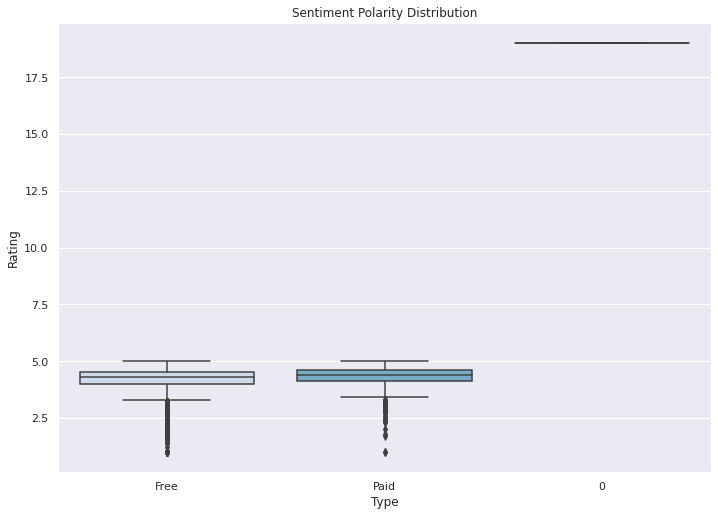

In [194]:
# Plotting "Box Plot"

sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Rating', data=ps_data_df, palette='Blues')
title = ax.set_title('Sentiment Polarity Distribution')

In box plot we can see there a record with 'null' Type and having outlier rating value i.e. above 17.5.

This valuse should not be a rating, as per above box plot Min Rating is 1 and Max range of Rating is 5.

Let's check unique values of Rating and identify this outlier value and their count.

Handling **Outlier Values** in Rating Column

In [195]:
ps_data_df.Rating.unique()    # to find unique rating values

array([ 4.1,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,  4.8,
        3.9,  4.9,  3.6,  3.7,  nan,  3.3,  3.4,  3.5,  3.1,  5. ,  2.5,
        3. ,  1. ,  1.9,  2.7,  2.8,  2.9,  2.6,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [196]:
# There is only one outlier value 19 in the Rating data.

# Let's check that record for more clarity

ps_data_df[ps_data_df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [197]:
# This record looks like a Data Entry mistake, as per the details, here 'CATEGORY' entry has been missed 
# and hence all other entries also got shifted to one column ahead

# let's delete this wrong category entry, shift other row entries and replace missing entry with appropriate category type

# Deleting entry :

from copy import deepcopy
missing_entry = deepcopy(ps_data_df.loc[10472])
missing_entry[1:] = missing_entry[1:].shift(periods=1)
ps_data_df.loc[10472] = missing_entry

# remove the temporary variable

del missing_entry

In [198]:
# As per App Name, this app can be categorised as "LIFESTYLE" category app

# Updating appropriate actegory for missing entry

ps_data_df.loc[10472, 'Category'] = 'LIFESTYLE'
ps_data_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content_Rating                                   Everyone
Genres                                                NaN
Last_Updated                            February 11, 2018
Current_Ver                                        1.0.19
Android_Ver                                    4.0 and up
Name: 10472, dtype: object

Handling **1474** **null** values of Rating Column

-----

In [199]:
# As per 'Box Plot' median value of the data is lying between 4 - 5, lets check the same update missing values accordingly.

In [200]:
# Checking median rating of rating column.
rating_median = ps_data_df['Rating'].median()
print(f'The median of of Rating column is {rating_median}.')

The median of of Rating column is 4.3.


In [201]:
# Filled NaN values in rating column.
ps_data_df.loc[ps_data_df['Rating'].isnull(), 'Rating'] = ps_data_df['Rating'].fillna(rating_median)

4. Handling **1 null** value of **Type** Column
-----

In [202]:
# Type
ps_data_df[ps_data_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [203]:
# In family category only Command & Conquer: Rivals app has NaN in its Type column.
df_groupby_category = ps_data_df.groupby('Category')

In [204]:
# The number of Free and Paid apps in Family category.
df_family = df_groupby_category.get_group('FAMILY')
df_family['Type'].value_counts()

Free    1720
Paid     185
Name: Type, dtype: int64

In [205]:
# NaN value in Type column filled with as Most number of apps are Free.
ps_data_df['Type'] = ps_data_df['Type'].fillna('Free')

In [206]:
# Type
ps_data_df[ps_data_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


5. Handling **8 Null** Values of **"Current Version"** Column
-----

In [207]:
ps_data_df['Current_Ver'].isnull().value_counts()

False    9652
True        8
Name: Current_Ver, dtype: int64

In [208]:
ps_data_df['Current_Ver']

0                     1.0.0
2                     1.2.4
3        Varies with device
4                       1.1
5                       1.0
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: Current_Ver, Length: 9660, dtype: object

In [209]:
# There are 8 NaN values and in some apps 'Current_Ver' is "Varies with device"

In [210]:
# Lets check count of "Varies with Device"

ps_data_df["Current_Ver"].value_counts()

Varies with device    1054
1.0                    797
1.1                    260
1.2                    176
2.0                    149
                      ... 
8.3                      1
5.2.5                    1
8.2.9                    1
2.71                     1
2.0.148.0                1
Name: Current_Ver, Length: 2818, dtype: int64

In [211]:
# Lets check count of "Varies with Device"

ps_data_df["Current_Ver"].mode()

0    Varies with device
dtype: object

In [212]:
# As per data mode of the Current Version is "Varies with device", so lets keep this Version as it is.

In [213]:
ps_data_df[ps_data_df.Current_Ver.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [214]:
# Finding corresponding Median "Current Versions" basis given "Android Versions" for above 8 Records

# Current_Ver Median for Android_Ver = '4.2 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '4.2 and up']
app_current_ver_df['Current_Ver'].mode()

0    1.0
dtype: object

In [215]:
# Current_Ver Median for Android_Ver = '1.5 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '1.5 and up']
app_current_ver_df['Current_Ver'].mode()

0    1.0
dtype: object

In [216]:
# Current_Ver Median for Android_Ver = '4.0 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '4.0 and up']
app_current_ver_df['Current_Ver'].mode()

0    1.0
dtype: object

In [217]:
# Current_Ver Median for Android_Ver = '1.6 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '1.6 and up']
app_current_ver_df['Current_Ver'].mode()

0    2.3.2
dtype: object

In [218]:
# Current_Ver Median for Android_Ver = '2.3 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '2.3 and up']
app_current_ver_df['Current_Ver'].mode()

0    1.0
dtype: object

In [219]:
# Current_Ver Median for Android_Ver = '2.0 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '2.0 and up']
app_current_ver_df['Current_Ver'].mode()

0      1.0
1    2.4.4
dtype: object

In [220]:
# Current_Ver Median for Android_Ver = '3.0 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '3.0 and up']
app_current_ver_df['Current_Ver'].mode()

0    1.0
dtype: object

In [221]:
# Updating 8 Null values of Current_Ver with corresponding Median derived as above,

ps_data_df.loc[15,'Current_Ver'] = '1.0'         # '4.2 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[1553,'Current_Ver'] = '1.0'       # '1.5 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[6322,'Current_Ver'] = '1.0'       # '4.0 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[6803,'Current_Ver'] = '2.3.2'     # '1.6 and up' - Android version corresponding Current Ver mode is "2.3.2"
ps_data_df.loc[7333,'Current_Ver'] = '1.0'       # '4.0 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[7407,'Current_Ver'] = '1.0'       # '2.3 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[7730,'Current_Ver'] = '1.0'       # '2.0 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[10342,'Current_Ver'] = '1.0'      # '3.0 and up' - Android version corresponding Current Ver mode is "1.0"

6. Handling **2 Null** values of **"Android_Ver"** column

In [222]:
ps_data_df['Android_Ver'].isnull().value_counts()

False    9658
True        2
Name: Android_Ver, dtype: int64

In [223]:
ps_data_df[ps_data_df.Android_Ver.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [224]:
# Finding corresponding Median "Android Versions" basis given "Current Versions" for above 2 Records

# Android_Ver Median for Current_Ver = '4.4'

app_android_ver_df = ps_data_df[ps_data_df['Current_Ver'] == '4.4']
app_android_ver_df['Android_Ver'].mode()

0    4.0.3 and up
dtype: object

In [225]:
# Android_Ver Median for Current_Ver = '1.1'

app_android_ver_df = ps_data_df[ps_data_df['Current_Ver'] == '1.1']
app_android_ver_df['Android_Ver'].mode()

0    4.1 and up
dtype: object

In [226]:
# Replacing NaN values with mode of corresponding mode value of Android_Ver
# For Current Version = 4.4 corresponding Mode of Android Version is "4.0.3 and up"
# For Current Version = 1.1 corresponding Mode of Android Version is "4.1 and up"

ps_data_df.loc[4453,'Android_Ver'] = '4.0.3 and up'
ps_data_df.loc[4490,'Android_Ver'] = '4.1 and up'

## **Exploring Dataset - 2**
-----
-----

## User Reviews Data
-----

In [227]:
## Let's have a glance over the number of rows and columns in our dataset
shape = reviews_df.shape
print("The data set contains {} Records.\nNumber of features are: {}. ".format(shape[0],(shape[1])))

The data set contains 64295 Records.
Number of features are: 5. 


In [228]:
# Let's have a glance on first five rows of our dataset
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [229]:
## Let's have a glance at last five rows of our dataset
reviews_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## Columns Description : Reviews Data.

1.  **App :** This column consist of the names of the Mobile Apps.
2. **Translated_Review :** This column consist of the system transltaed user reviews of the Mobile Apps.
3. **Sentiment :** This column consist of the sentiment type (Positive / Negative / Neutral) of the user review for Mobile App.
4. **Sentiment Polarity:** This column consist of the category of Sentiment Polarity for the user review.Sentiment polarity defines the orientation of the expressed sentiment. It defines the extent of the sentiment of the text in numrical data.
5. **Sentiment Subjectivity :** This column consist of a measure of the intensity of the sentiment one expressed through their text. It refers to the text that contains text which is usually expressed by a human having typical moods, emotions, and feelings.

In [230]:
# Summary of Critical Information for the dataset.

print(f'The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).')
print('\n')
def ur_df():
  temp = pd.DataFrame(index = reviews_df.columns)
  temp['Data_type'] = reviews_df.dtypes
  temp['Unique_count'] = reviews_df.nunique()
  temp['Count']= reviews_df.isnull().count()
  temp['Missing_values_count'] = reviews_df.isnull().sum()
  temp['Missing_percentage']= round( temp['Missing_values_count'] / temp['Count'] * 100, 2) 
  return temp
ur_df()

# This can also be obtained by - df.info()

The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).




,Data_type,Unique_count,Count,Missing_values_count,Missing_percentage
App,object,1074,64295,0,0.00
Translated_Review,object,27994,64295,26868,41.79
Sentiment,object,3,64295,26863,41.78
Sentiment_Polarity,float64,5410,64295,26863,41.78
Sentiment_Subjectivity,float64,4474,64295,26863,41.78


### **From the above review on dataset, I have got some observations as below:**

1. Translated_Review column has total 26868 null values which contributes 41.79% of the column data.
2. Sentiment column has total 26863 null values which contributes 41.78% of the total records.
3. Sentiment_Polarity column has total 26863 null values which contributes 41.78% of the total records.
4. Sentiment_Subjectivity column also has total 26863 null values which contributes 41.78% of the total records.
5. No discrepancies found in App Column data.

### **Handling Missing Values : Reviews_Dataset**

In [231]:
# Created a copy of User Reviews.
reviews_data_copy = reviews_df.copy()

In [232]:
# As checked above in sabset "review_nan_value_check" all 26868 records having "NaN" value
# These records are unreviewed, hence to optimise master review data, dropping these unreviewed records

# Count of Null Values from each columns.
reviews_data_copy.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [233]:
# Drooping Na rows having all NaN values in rows.
reviews_data_copy = reviews_data_copy.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], how='all')

In [234]:
# Checking if any NaN values in dataframe.
reviews_data_copy.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [235]:
# Dropped NaN from Translated column and created a clean User Reviews data.
reviews_data_copy = reviews_data_copy.dropna(subset= ["Translated_Review"], how = "all")

In [236]:
# Checking if any NaN values in dataframe.
reviews_data_copy.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [237]:
# Shape of dataframe after dropping NaN values.
reviews_data_copy.shape

(37427, 5)

In [238]:
count_unique_apps = reviews_data_copy['App'].nunique()
print(f'The count of Unique Apps in cleaned user reviews dataset {count_unique_apps}.')

The count of Unique Apps in cleaned user reviews dataset 865.


In [239]:
# A FINAL CHECK FOR REVIEWS DATA CLEANING
# FIND UNIQUE, NULL COUNT & DATA TYPES

print('Shape of Revies_Data is :', reviews_data_copy.shape)

def reviews_info1():
  temp_ps = pd.DataFrame(index=reviews_data_copy.columns)
  temp_ps['DataType'] = reviews_data_copy.dtypes
  temp_ps['Non-Null_Values'] = reviews_data_copy.count()
  temp_ps['Unique_Values'] = reviews_data_copy.nunique()
  temp_ps['NaN_Values'] = reviews_data_copy.isnull().sum()
  temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(reviews_data_copy))*100
  return temp_ps
reviews_info1()

Shape of Revies_Data is : (37427, 5)


,DataType,Non-Null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
App,object,37427,865,0,0.0
Translated_Review,object,37427,27994,0,0.0
Sentiment,object,37427,3,0,0.0
Sentiment_Polarity,float64,37427,5410,0,0.0
Sentiment_Subjectivity,float64,37427,4474,0,0.0


**So, now we can see, Reviews Dataset is ready to process**
1. No Null Values
2. Correct Datatypes
3. Same no of records in all columns

-----

## **[CHECK BELOW CODE CELL] Data Wrangling - Play Store Dataset**
-----

1. Creating a copy of original dataset.
2. Merging Play Store & Reviews Data for effective Analysis of Data
3. Removing special characters from values.
4. Changing data types of columns

In [240]:
# Null values from each column.
ps_data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            1
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

### No Null values found in the Play Store dataset
-----

In [241]:
# Checking unique values in Category Column.
ps_data_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Found "Category" Column datatype correct.

No other discrepancy found in "Category" Column

In [242]:
# Checking unique values in Category Column.
ps_data_df['Rating'].unique()

array([4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, 4.8, 3.9, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.5, 3.0, 1.0, 1.9, 2.7, 2.8,
       2.9, 2.6, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2,
       '1.9'], dtype=object)

In [243]:
# Datatype is wrong in Rating column
# All values are of "float" datatype, lets change datatype of ratings as 'float' datatype

ps_data_df['Rating'] = ps_data_df['Rating'].astype('float')
ps_data_df['Rating'].dtype

dtype('float64')

In [244]:
# let's check all Unique values in this column

ps_data_df['Reviews'].describe()

count     9660
unique    5333
top          0
freq       593
Name: Reviews, dtype: object

In [245]:
# No of Reviews must be 'integer' hence converting "Reviews" dtype from 'float' to 'int' for better numerical analysis
ps_data_df["Reviews"] = pd.to_numeric(ps_data_df["Reviews"])

In [246]:
# Size column.
ps_data_df['Size'].unique() #Unique values in Size

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '46M', '51M', '48M', '8.5M', '41M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '8.4M', '118k', '44M', '695k', '1.6M', '18k', '53M',
     

In [247]:
# Replaced 'Varies with device' size with 'NaN'.
ps_data_df['Size'] =  ps_data_df['Size'].replace('Varies with device', 'NaN', regex=True)

In [248]:
# Keeping apps with MB as it is and converting KB into MB.

size =[]

for i in ps_data_df['Size']:
    if i == 'NaN':
        size.append('NaN')
    elif i[-1] == 'k':
        size.append(float(i[:-1])/1000)
    else:
        size.append(float(i[:-1]))

In [249]:
# Size column data type changed.
ps_data_df['Size'] = size 
ps_data_df['Size'] = ps_data_df['Size'].astype(float)

In [250]:
ps_data_df['Size'].describe()

count    8433.000000
mean       20.395906
std        21.827699
min         0.008500
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64

In [251]:
# The median app size column.
size_median = ps_data_df['Size'].median()
print(size_median)

12.0


In [252]:
# NaN values filled with median of Size column.
ps_data_df.loc[ps_data_df['Size'].isnull(), 'Size'] = ps_data_df['Size'].fillna(size_median)

In [253]:
ps_data_df['Size'].isnull().value_counts()

False    9660
Name: Size, dtype: int64

In [254]:
# Category unique count.
catergory_unique_count = ps_data_df['Category'].nunique()
print(f'The total unique categories are {catergory_unique_count}.')

The total unique categories are 33.


In [255]:
# Category Column unique value count.
ps_data_df['Category'].value_counts()

FAMILY                 1906
GAME                    926
TOOLS                   829
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               370
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
ENTERTAINMENT            79
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [256]:
# App column unique count of Apps.
app_unique_count = ps_data_df['App'].nunique()
print(f'Total unique app names in App column {app_unique_count}.')

Total unique app names in App column 9660.


In [257]:
# Installs column unique entries.
ps_data_df['Installs'].unique()

array(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '500,000+',
       '1,000,000,000+', '100,000,000+', '1,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '500,000,000+', '0+', '0'], dtype=object)

In [258]:
# Convert Installs to numeric and remove special characters.
ps_data_df['Installs'] = ps_data_df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
ps_data_df['Installs'] = ps_data_df['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
ps_data_df['Installs'] = ps_data_df['Installs'].apply(lambda x : float(x))

In [259]:
ps_data_df['Installs'].describe()

count    9.660000e+03
mean     7.793441e+06
std      5.376719e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [260]:
# Found datatype correct in "Installs" column
# No other discrepancies found in the "Install" data

In [261]:
# Now, we have only two unique types in Type column.
ps_data_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [262]:
# Checking unique values in Price.
ps_data_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$1.49', '$2.99', '$7.99', '$3.49', '$1.99',
       '$5.99', '$6.99', '$9.99', '$7.49', '$0.99', '$1.00', '$2.49',
       '$10.99', '$1.50', '$14.99', '$15.99', '$79.99', '$9.00', '$10.00',
       '$16.99', '$11.99', '$29.99', '$74.99', '$5.49', '$33.99',
       '$24.99', '$39.99', '$19.99', '$4.49', '$1.70', '$8.99', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$2.50', '$1.59', '$6.49',
       '$1.29', '$5.00', '$13.99', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85',
       '$46.99', '$109.99', '$3.95', '$154.99', '$3.08', '$2.59', '$4.80',
       '$1.96', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04', '$12.99',
       '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95', '$2.90',
       '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [263]:
# Converting Price into numerical values and replacing $.
ps_data_df['Price'] = ps_data_df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
ps_data_df['Price'] = ps_data_df['Price'].apply(lambda x : float(x))

In [264]:
#Price column description #51
ps_data_df['Price'].describe()

count    9660.000000
mean        1.097117
std        16.850750
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [265]:
# Checking unique Values.
ps_data_df['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [266]:
# As per Unique values, there are some "Unrated" values.
# Let's check those values

ps_data_df['Content_Rating'].value_counts()

Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64

In [267]:
# There are two entries which are 'Unrated', lets check those records

ps_data_df[ps_data_df['Content_Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
7312,Best CG Photography,FAMILY,4.3,1.0,2.5,500.0,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186.0,6.4,50000.0,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


## CHECK

As per above records both the 'Unrated' apps are related to general use like "Photography" and "Map"

Their Categories are 'FAMILY' & "TOOLS" respectively.

Here we can check mode of the records having "FAMILY" & 'TOOLS'as their categories and accordingly we can update above 2 record.

In [278]:
# Let's check mode for the record belongs to 'Family' Category (Record No 7312)

temp_cat_data1 = ps_data_df[ps_data_df['Category'] == 'FAMILY']
temp_cat_data1['Content_Rating'].mode()

0    Everyone
dtype: object

In [279]:
# Let's check mode for the record belongs to 'Tools' Category (Record No 8266)

temp_cat_data1 = ps_data_df[ps_data_df['Category'] == 'TOOLS']
temp_cat_data1['Content_Rating'].mode()

0    Everyone
dtype: object

In [268]:
# As per above, both the Apps can be considered for 'Everyone' as content rating.
# Let's correct 'Content Rating' records for both the records

ps_data_df.loc[7312,'Content_Rating'] = 'Everyone'
ps_data_df.loc[8266,'Content_Rating'] = 'Everyone'

ps_data_df['Content_Rating'].value_counts()

Everyone           7906
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Name: Content_Rating, dtype: int64

In [269]:
# Here we checking the unique values in Genres.
ps_data_df['Genres'].isnull().value_counts()

False    9659
True        1
Name: Genres, dtype: int64

In [270]:
# There is one entry which is null, lets check that record

ps_data_df[ps_data_df.Genres.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19.0,3.0,1000.0,Free,0.0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [271]:
# During brief review of the data, its evident that 'Genre' and 'Category' corresponds to each other
# Here we can check mode of the "Genres" column data for all the records having category mapped as "LIFESTYLE"

temp_cat_data = ps_data_df[ps_data_df['Category'] == 'LIFESTYLE']
temp_cat_data['Genres'].mode()

0    Lifestyle
dtype: object

In [272]:
# As per above mode check, we can conclude that most of the "Lifestyle" category Apps having "Lifestyle" as Genre.

# hence, lets update 'GENRES' for above 'NaN' record (index no = 10472) as 'Lifestyle'

ps_data_df.loc[10472,'Genres'] = 'Lifestyle'

In [273]:
# Geners count
geners_df = ps_data_df['Genres'].value_counts().sort_values(ascending=False).reset_index().head(30)
geners_df.rename({'index': 'Genres', 'Genres': 'Total_Count'}, axis=1, inplace=True)

In [274]:
# As checked eralier, we also found some datatype discrepancies in column 'Last Updated'
# 'Last Update' column is a date hence data type for this column should be 'datetime'
# Let's convert the datatype of this column in 'datetime'

ps_data_df['Last_Updated'] = pd.to_datetime(ps_data_df['Last_Updated'])
ps_data_df['Last_Updated']

0       2018-01-07
2       2018-08-01
3       2018-06-08
4       2018-06-20
5       2017-03-26
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last_Updated, Length: 9660, dtype: datetime64[ns]

In [275]:
# In order to anlyse date and time realted trends effectively, let's seperate Year / Month / day and keep it in new columns

ps_data_df['LastUpdated_Day'] = ps_data_df['Last_Updated'].dt.day
ps_data_df['LastUpdated_Month'] = ps_data_df['Last_Updated'].dt.month
ps_data_df['LastUpdated_Year'] = ps_data_df['Last_Updated'].dt.year

In [276]:
# let's check the corrections

ps_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,26,3,2017


In [277]:
# A FINAL CHECK FOR PLAY STORE DATA CLEANING
# FIND UNIQUE, NULL COUNT & DATA TYPES

print('Shape of Play_Store_Data is :', ps_data_df.shape)

def playstoreinfo1():
  temp_ps = pd.DataFrame(index=ps_data_df.columns)
  temp_ps['DataType'] = ps_data_df.dtypes
  temp_ps['Non-Null_Values'] = ps_data_df.count()
  temp_ps['Unique_Values'] = ps_data_df.nunique()
  temp_ps['NaN_Values'] = ps_data_df.isnull().sum()
  temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(ps_data_df))*100
  return temp_ps
playstoreinfo1()

Shape of Play_Store_Data is : (9660, 16)


,DataType,Non-Null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
App,object,9660,9660,0,0.0
Category,object,9660,33,0,0.0
Rating,float64,9660,39,0,0.0
Reviews,float64,9660,5332,0,0.0
Size,float64,9660,459,0,0.0
Installs,float64,9660,20,0,0.0
Type,object,9660,2,0,0.0
Price,float64,9660,92,0,0.0
Content_Rating,object,9660,5,0,0.0
Genres,object,9660,118,0,0.0


So, Now we can see, Play Store Dataset is ready to process
1. No Null Values
2. Correct Datatypes
3. Same no of records in all columns
-----

# **App Business Model Analysis (Free & Paid)**

Finalizing Business Model is one of the important cornerstone for any Business, hence before proceeding further with App Development, one need to finalize appropriate Mobile App Business Model (Free / Paid) for the desired "Success" of his / her App Business

There are two types of App Development Business Models. 
1. Free Apps
2. Paid Apps

Will follow below stpes to finalize the same,

1. Analyse available statistical data for both the Apps (Free & Paid). 

2. Understand their Pro-Cons with the help of stats

3. Recommend best Mobile App Business Model and Successful Genres / Categories / Apps to App Makers Management Team.

**App Type wise - Market Share**

In [99]:
# Let's check Market share of Paid & Free Apps on Play Store

app_market_pivot = pd.pivot_table(ps_data_df, values=['App'], index='Type',aggfunc='count')
app_market_pivot

,App
Type,
Free,8906
Paid,754


In [100]:
#Let's understand Market Share through a pie chart visualization
# fig=plt.figure(figsize=(10,5))
# plt.pie(app_market_pivot,labels=App,explode=[0.02,0.1],autopct='%.3f%%')
# plt.title("App Type wise Market Share",fontsize=15,fontweight='bold')                           #showing graph title
# plt.legend(fontsize=14)                                                                         #show legend
# plt.show()

**App Type wise - Quantitative Analysis**

In [101]:
# Let's summaries related App Business parameters for further understanding of Business Models

free_paid_stat_df = ps_data_df.groupby(['Type']).mean()
free_paid_stat_df

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
Type,,,,,,,,
Free,4.185616,234228.538738,19.409362,8.446808e+06,0.000000,15.634965,6.367617,2017.402650
Paid,4.269761,8746.374005,18.385809,7.607929e+04,14.055902,15.555703,6.316976,2016.677719


**CHECK - LINKED WITH MERGED SENTIMENT DATA**

In [102]:
# free_paid_sentiment_pivot = pd.pivot_table(merg_sent_df, values=['Sentiment_Polarity','Sentiment_Subjectivity'], index='Type',aggfunc='mean')
# free_paid_sentiment_pivot

In [103]:
paid_app_df = ps_data_df[ps_data_df['Type'] == 'Paid']

paid_app_df[["Price"]].describe(include="all")

,Price
count,754.000000
mean,14.055902
std,58.821000
min,0.990000
25%,1.490000
50%,2.990000
75%,4.990000
max,400.000000


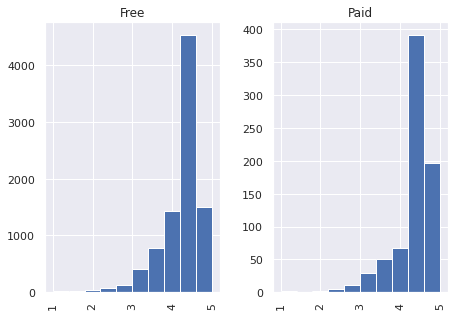

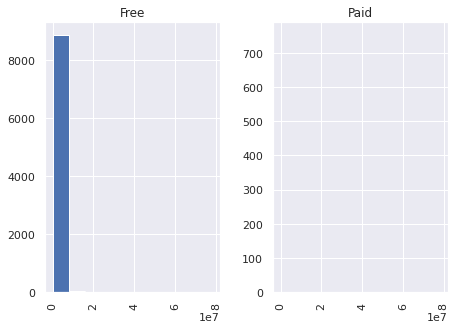

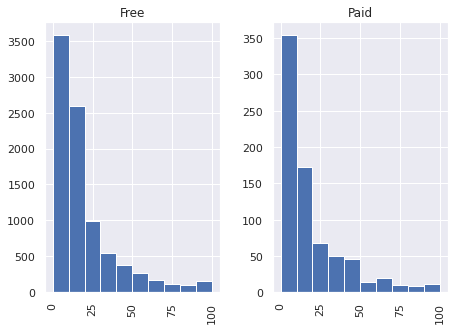

In [104]:
# Let's understand statistical differences with graphical visualization

top_categories = ps_data_df.groupby("Type").filter(lambda x: len(x) > 0).reset_index()
array = top_categories['Rating'].hist(by=top_categories['Type'], sharex=True, figsize=(7,5))
array = top_categories['Reviews'].hist(by=top_categories['Type'], sharex=True, figsize=(7,5))
array = top_categories['Size'].hist(by=top_categories['Type'], sharex=True, figsize=(7,5))

**Inference :** 
From above stats and grpahs it's pretty clear that both the Free & Paid Apps have drastical diffrence in some basic parameters fo App Business. Some of the Imporant parameters like below,

1. Average Installation count
2. Average Review Count
3. Average Rating

**From above diffreneces we can easily make out below Pros-Cons of respective Business Model.**

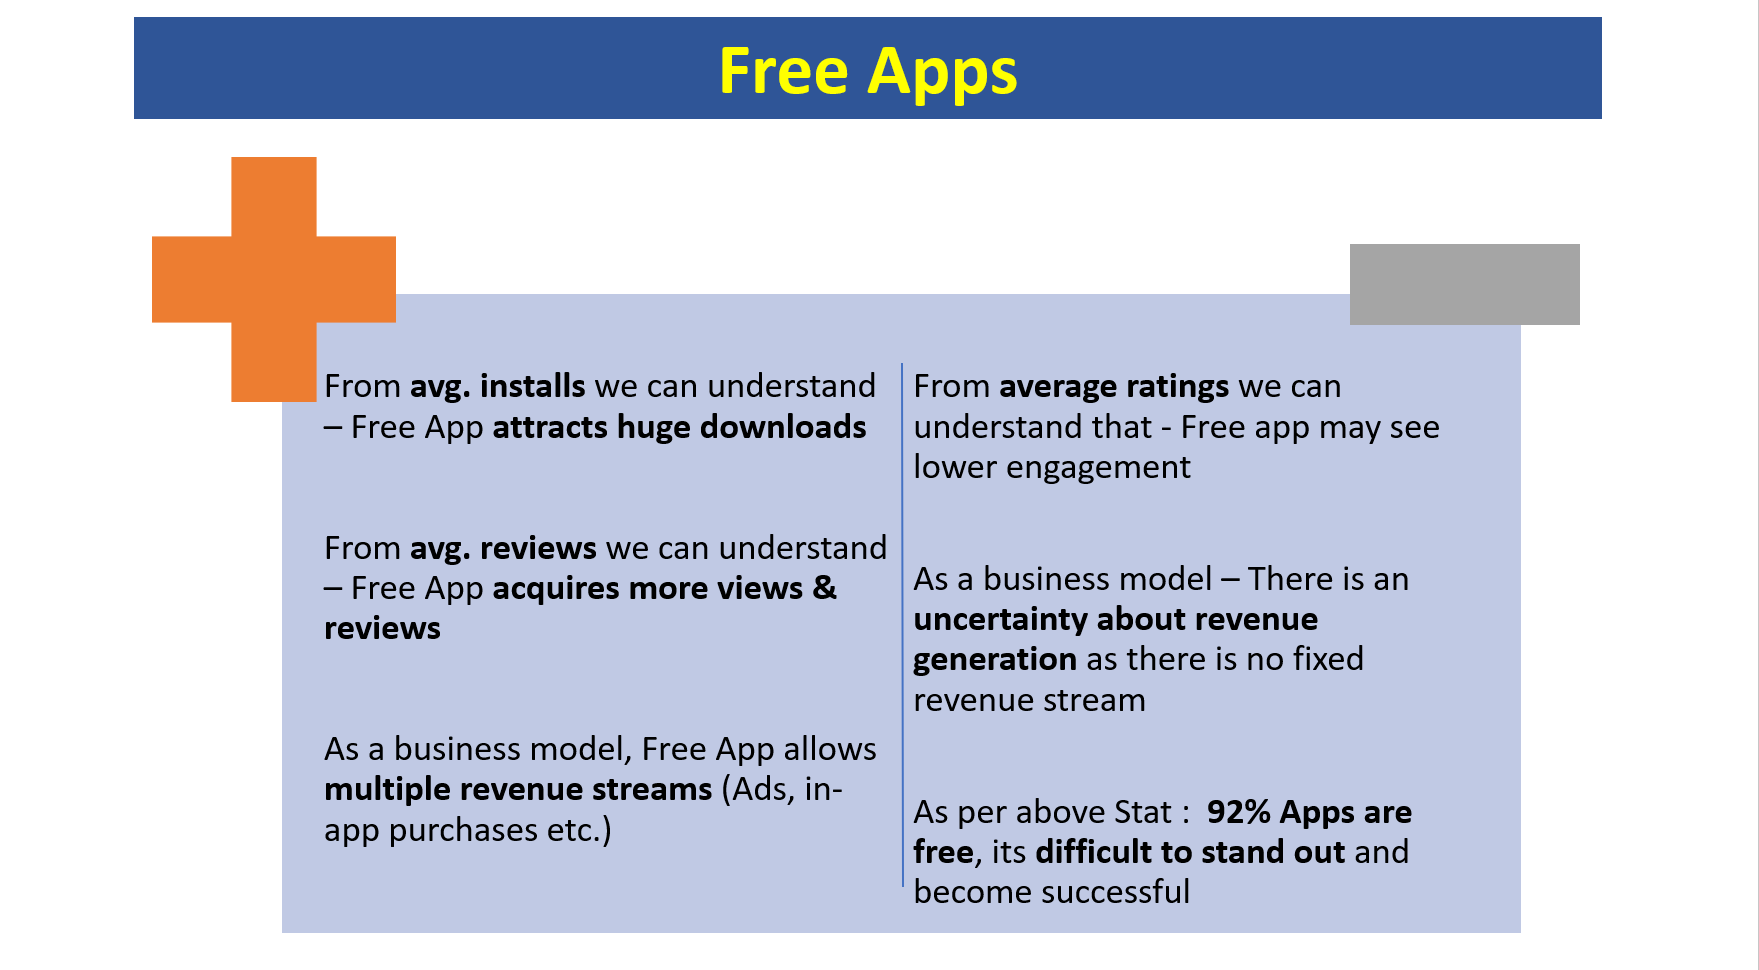

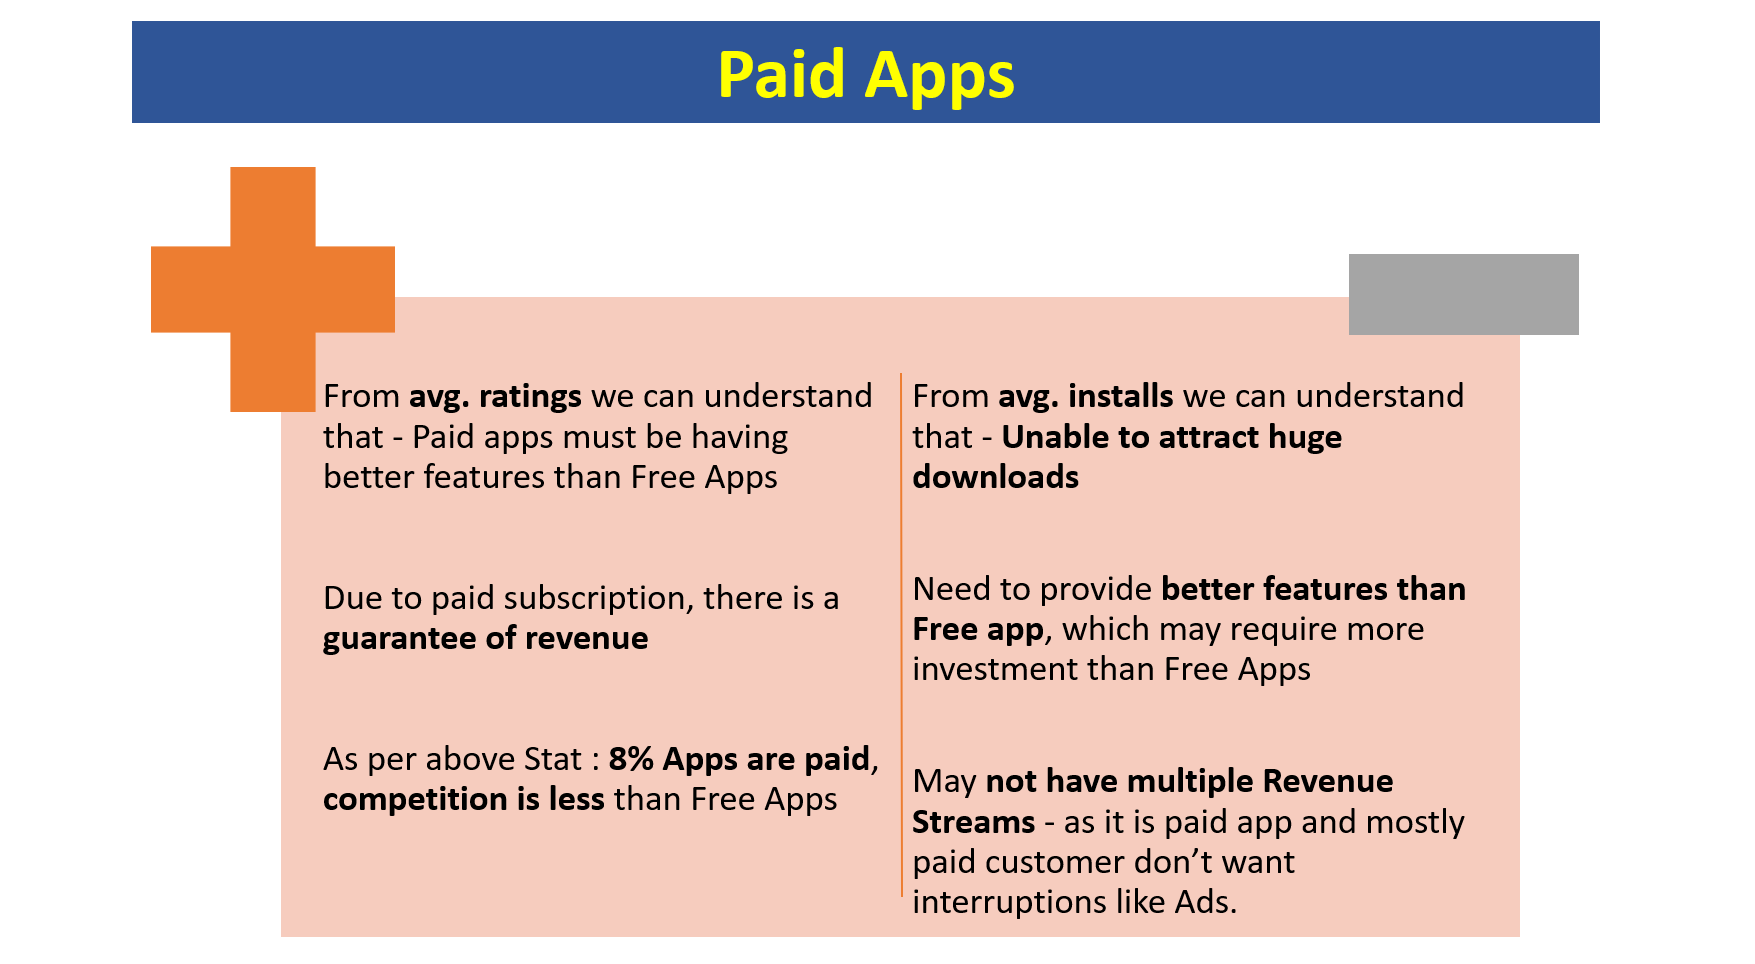

In view of above, both the Business Models have there own Pros & Cons as well as other factors; which makes them Successful / Un-successful in their App making Business.

Hence, both the **Business Models (Free / Paid) are unique** in their own business environment.

Therefore, we cant analyse both as a whole, to understand **Success and Engagement factors of App making Business.**

in order to analyse the Success & Engagement Factors, we need to analyse both the App "Types" separately for respective success factors.

# **DataFrames - Free & Paid Apps**

In [155]:
# Let's make separate DataFrames for Free Apps and Paid Apps

# Free App Dataframe :

free_app_df = ps_data_df[ps_data_df['Type'] == 'Free']

# Paid App Dataframe :

paid_app_df = ps_data_df[ps_data_df['Type'] == 'Paid']

### **Identify Top 10 Performing : Genres | Catgories | Apps**
-----

### Free Apps
-----

**1. Identify Top Performing - Genres**

In [156]:
# Checked Free App data Stat to understand the "Genres" having Above Average success on Important parameters like,
# Installs | Rating | Reviews

free_app_df.describe()

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
count,8906.000000,8.906000e+03,8906.000000,8.906000e+03,8906.0,8906.000000,8906.000000,8906.000000
mean,4.185616,2.342285e+05,19.409362,8.446808e+06,0.0,15.634965,6.367617,2017.402650
std,0.495977,1.905351e+06,20.528382,5.594814e+07,0.0,9.484396,2.624773,1.075797
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.0,1.000000,1.000000,2010.000000
25%,4.000000,2.900000e+01,5.500000,1.000000e+03,0.0,6.000000,5.000000,2017.000000
50%,4.300000,1.366500e+03,12.000000,1.000000e+05,0.0,16.000000,7.000000,2018.000000
75%,4.500000,3.517175e+04,25.000000,1.000000e+06,0.0,24.000000,8.000000,2018.000000
max,5.000000,7.812821e+07,100.000000,1.000000e+09,0.0,31.000000,12.000000,2018.000000


**There are three important parameters, which "Customers" check before subscribing any App**
1. No of Installs / Subscriptions
2. Rating of the App
3. No of Reviews recieved by App

-------------------------------------------------------------------------------------------------------------------------------------

**Hence, as per above stat description table, we need to filter out above average performers (Genres | Cateogory | Apps) on below parameters KPIs**

1. Avg Installs = 8.446808e+06
2. Mean Rating = 4.185616 
3. Avg Reviews = 2.342285e+05
-----

In [157]:
# Filter free app data as per above criteria & check shape of dataset to understand output data

abv_avg_free_app_data_df = free_app_df[ (free_app_df['Installs'] > 8.446808e+06) & (free_app_df['Rating'] > 4.185616) & (free_app_df['Reviews'] > 2.342285e+05)]
abv_avg_free_app_data_df.shape

(784, 16)

In [158]:
# We have found 784 - Above Average performing free Apps

# Now, let's sort this data in below order and identify Top 10 high performing "Genres" in Free App Business Model

abv_avg_free_app_data_df1 = abv_avg_free_app_data_df.groupby("Genres").mean().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False)
top10_genres_free_df = abv_avg_free_app_data_df1.head(10)
top10_genres_free_df

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
Genres,,,,,,,,
Communication,4.374000,4.177945e+06,14.092000,1.520000e+08,0.0,13.660000,7.020000,2017.960000
Travel & Local,4.447059,1.343522e+06,15.458824,1.470588e+08,0.0,10.764706,7.588235,2018.000000
Productivity,4.438889,1.273366e+06,16.936111,1.250000e+08,0.0,10.416667,7.250000,2017.888889
Social,4.366667,3.945468e+06,22.176667,1.200000e+08,0.0,13.300000,7.466667,2017.966667
Education;Education,4.700000,6.297590e+06,12.000000,1.000000e+08,0.0,6.000000,8.000000,2018.000000
Adventure;Action & Adventure,4.500000,4.443407e+06,67.000000,1.000000e+08,0.0,31.000000,7.000000,2018.000000
News & Magazines,4.383333,1.449862e+06,12.275000,9.500000e+07,0.0,16.666667,7.333333,2018.000000
Tools,4.470149,3.214588e+06,12.208955,9.373134e+07,0.0,13.417910,6.865672,2017.910448
Video Players & Editors,4.492000,2.511820e+06,21.896000,9.320000e+07,0.0,12.640000,7.800000,2017.760000


In [159]:
top10_genres_free_df1 = top10_genres_free_df.iloc[0:,:0]
top10_genres_free_df1.reset_index()

,Genres
0,Communication
1,Travel & Local
2,Productivity
3,Social
4,Education;Education
5,Adventure;Action & Adventure
6,News & Magazines
7,Tools
8,Video Players & Editors
9,Casual


**2. Identify Top Performing - Categories**

-----

Let's identify Top Performing Free App categories within above Top 10 Genres

In [160]:
# Merging Top10 genres dataframe with base dataframe (abv_avg_free_app_data_df) to filter App data belongs to these Top10 Genres.

merged_free_top10_genres_df = pd.merge(abv_avg_free_app_data_df, top10_genres_free_df1, how='inner', left_on='Genres', right_on='Genres')
merged_free_top10_genres_df.shape

(269, 16)

In [161]:
# Now, we have found 269 - Above Average performing free Apps

# Now, let's sort this data in below order and identify Top high performing "Categories" in Free App Business Model

# top_perf_cat_free_df1 = merged_free_top10_genres_df.groupby("Category").mean().sort_values(by = ['Install','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False)
# top10_cat_free_df = top_perf_cat_free_df.head(10)
# top10_cat_free_df

abv_avg_free_app_data_df1 = merged_free_top10_genres_df.groupby("Category").mean().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False)
top10_cat_free_df = abv_avg_free_app_data_df1.head(10)
top10_cat_free_df


,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
Category,,,,,,,,
COMMUNICATION,4.374000,4.177945e+06,14.092000,1.520000e+08,0.0,13.660000,7.020000,2017.960000
TRAVEL_AND_LOCAL,4.447059,1.343522e+06,15.458824,1.470588e+08,0.0,10.764706,7.588235,2018.000000
PRODUCTIVITY,4.438889,1.273366e+06,16.936111,1.250000e+08,0.0,10.416667,7.250000,2017.888889
SOCIAL,4.366667,3.945468e+06,22.176667,1.200000e+08,0.0,13.300000,7.466667,2017.966667
FAMILY,4.430769,4.273849e+06,42.680769,1.003846e+08,0.0,16.846154,6.500000,2017.846154
NEWS_AND_MAGAZINES,4.383333,1.449862e+06,12.275000,9.500000e+07,0.0,16.666667,7.333333,2018.000000
TOOLS,4.470149,3.214588e+06,12.208955,9.373134e+07,0.0,13.417910,6.865672,2017.910448
VIDEO_PLAYERS,4.492000,2.511820e+06,21.896000,9.320000e+07,0.0,12.640000,7.800000,2017.760000
GAME,4.533333,4.347306e+06,43.333333,4.666667e+07,0.0,11.833333,7.000000,2018.000000


In [162]:
# Let's get Top 10 Category names in Free Apps

top10_cat_free_df1 = top10_cat_free_df.iloc[0:,:0]
top10_cat_free_df1.reset_index()

,Category
0,COMMUNICATION
1,TRAVEL_AND_LOCAL
2,PRODUCTIVITY
3,SOCIAL
4,FAMILY
5,NEWS_AND_MAGAZINES
6,TOOLS
7,VIDEO_PLAYERS
8,GAME


**3. Identify Top Performing - Apps**

-----

Let's identify Top Performing Free App categories within above Top 10 Genres

In [163]:
# Merging Top categories dataframe with base dataframe (abv_avg_free_app_data_df) to filter App data belongs to these Top Categories.

merged_free_top_cat_df = pd.merge(merged_free_top10_genres_df, top10_cat_free_df1, how='inner', left_on='Category', right_on='Category')
merged_free_top_cat_df.shape

(269, 16)

In [164]:
# Now, we have found 269 - Above Average performing free Apps

# Now, let's sort this data in below order and identify Top high performing Top 10 "Apps" in Free App Business Model

top10_app_free_df = merged_free_top_cat_df.groupby("App").sum().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10).reset_index()
top10_app_free_df

,App,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
0,Instagram,4.5,66509917.0,12.0,1.000000e+09,0.0,31,7,2018
1,WhatsApp Messenger,4.4,69109672.0,12.0,1.000000e+09,0.0,3,8,2018
2,Google,4.4,8021623.0,12.0,1.000000e+09,0.0,3,8,2018
3,Google Drive,4.4,2728941.0,12.0,1.000000e+09,0.0,30,7,2018
4,YouTube,4.3,25623548.0,12.0,1.000000e+09,0.0,2,8,2018
5,Google Chrome: Fast & Secure,4.3,9642112.0,12.0,1.000000e+09,0.0,1,8,2018
6,Maps - Navigate & Explore,4.3,9231613.0,12.0,1.000000e+09,0.0,31,7,2018
7,Gmail,4.3,4604324.0,12.0,1.000000e+09,0.0,2,8,2018
8,Google+,4.2,4828372.0,12.0,1.000000e+09,0.0,26,7,2018
9,Google Street View,4.2,2129707.0,12.0,1.000000e+09,0.0,6,8,2018


### Free Apps
-----

**1. Identify Top Performing - Genres**

-----

In [165]:
# Checked Paid App data Stat to understand the "Genres" having Above Average success on Important parameters like,
# Installs | Rating | Reviews

paid_app_df.describe()

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
count,754.000000,7.540000e+02,754.000000,7.540000e+02,754.000000,754.000000,754.000000,754.000000
mean,4.269761,8.746374e+03,18.385809,7.607929e+04,14.055902,15.555703,6.316976,2016.677719
std,0.497631,8.996140e+04,21.233397,5.396857e+05,58.821000,8.871980,3.050100,1.555817
min,1.000000,0.000000e+00,0.014000,0.000000e+00,0.990000,1.000000,1.000000,2011.000000
25%,4.200000,6.000000e+00,3.300000,1.000000e+02,1.490000,8.000000,4.000000,2016.000000
50%,4.300000,8.850000e+01,12.000000,1.000000e+03,2.990000,16.000000,6.000000,2017.000000
75%,4.600000,1.215250e+03,25.000000,1.000000e+04,4.990000,23.000000,8.000000,2018.000000
max,5.000000,2.375336e+06,100.000000,1.000000e+07,400.000000,31.000000,12.000000,2018.000000


There are three important parameters, which "Customers" check before subscribing any App
1. No of Installs / Subscriptions
2. Rating of the App
3. No of Reviews recieved by App

-------------------------------------------------------------------------------------------------------------------------------------

Hence, as per above stat description table, we need to filter out above average performers (Genres | Cateogory | Apps) on below parameters KPIs

1. Avg Installs = 7.607929e+04
2. Median Rating = 4.269761 
3. Avg Reviews = 8.746374e+03
-----

In [166]:
# Filter paid app data as per above criteria & check shape of dataset to understand output data

abv_avg_paid_app_data_df = paid_app_df[ (paid_app_df['Installs'] > 7.607929e+04) & (paid_app_df['Rating'] > 4.269761) & (paid_app_df['Reviews'] > 8.746374e+03)]
abv_avg_paid_app_data_df.shape

(73, 16)

In [167]:
# We have found 73 - Above Average performing paid Apps

# Now, let's sort this data in below order and 
# identify Top 20 high performing "Genres" in paid App Business Model (Due to Low App data and to have good sample size to filter it down)

top20_genres_paid_df = abv_avg_paid_app_data_df.groupby("Genres").mean().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(20)
top20_genres_paid_df1= top20_genres_paid_df.iloc[0:,:0]
top20_genres_paid_df1

""
Genres
Arcade;Action & Adventure
Action
Communication
Lifestyle
Sports
Card;Action & Adventure
Arcade
Strategy
Puzzle;Brain Games


**2. Identify Top Performing - Categories**

-----

Let's identify Top Performing Free App categories within above Top 10 Genres

In [168]:
# Merging Top20 genres dataframe with base dataframe (abv_avg_paid_app_data_df) to filter App data belongs to these Top20 Genres.

merged_paid_top20_genres_df = pd.merge(abv_avg_paid_app_data_df, top20_genres_paid_df1, how='inner', left_on='Genres', right_on='Genres')
merged_paid_top20_genres_df.shape

(60, 16)

In [169]:
# Now, we have found 60 - Above Average performing paid Apps

# Now, let's sort this data in below order and identify Top 10 high performing "Categories" in Paid App Business Model

top10_cat_paid_df = merged_paid_top20_genres_df.groupby("Category").mean().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10)
top10_cat_paid_df1 = top10_cat_paid_df.iloc[0:,:0]
top10_cat_paid_df1

""
Category
GAME
COMMUNICATION
LIFESTYLE
SPORTS
FAMILY
PHOTOGRAPHY
PERSONALIZATION
TOOLS
PRODUCTIVITY


**3. Identify Top Performing - Apps**

-----

In [170]:
# Merging Top categories dataframe with base dataframe (merged_paid_top20_genres_df) to filter App data belongs to these Top Categories.

merged_paid_top_cat_df = pd.merge(merged_paid_top20_genres_df, top10_cat_paid_df1, how='inner', left_on='Category', right_on='Category')
merged_paid_top_cat_df.shape

(58, 16)

In [171]:
# Now, we have found 58 - Above Average performing paid Apps

# Now, let's sort this data in below order and identify high performing Top 10 "Apps" in Paid App Business Model

top10_app_paid_df = merged_paid_top_cat_df.groupby("App").sum().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10)
top10_app_paid_df1 = top10_app_paid_df.iloc[0:,:0]
top10_app_paid_df1

""
App
Hitman Sniper
Minecraft
Where's My Water?
Bloons TD 5
Five Nights at Freddy's
DraStic DS Emulator
Cut the Rope GOLD
Tasker
Threema


# **Installs Data Analysis**

-----

1. Understand relation of **'Installs' and 'App Reviews' - Free Apps**

-----

In [172]:
insta_rev_free_df = free_app_df.groupby('Installs')['Reviews'].mean().reset_index().sort_values(by = ['Installs'], axis=0, ascending=[False], inplace=False)
insta_rev_free_df

,Installs,Reviews
19,1.000000e+09,2.000252e+07
18,5.000000e+08,9.848708e+06
17,1.000000e+08,4.032929e+06
16,5.000000e+07,1.221054e+06
15,1.000000e+07,3.482721e+05
14,5.000000e+06,1.010718e+05
13,1.000000e+06,3.222234e+04
12,5.000000e+05,8.965377e+03
11,1.000000e+05,2.535830e+03
10,5.000000e+04,7.452867e+02


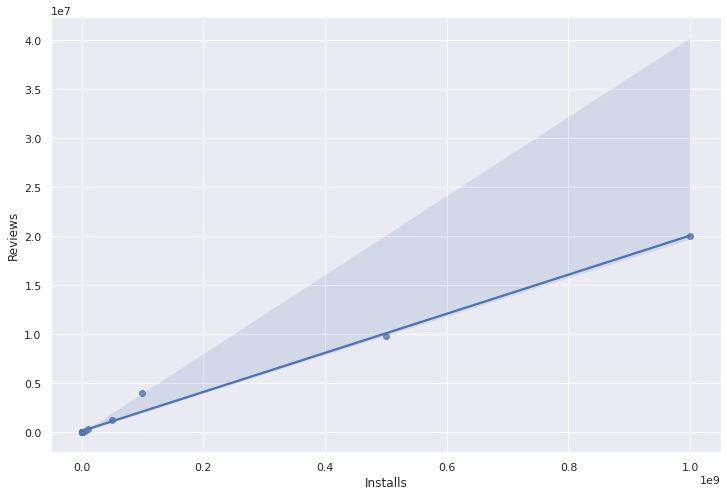

In [173]:
# Let's undestand relation of Installs and Reviews of App by Graphical Visualtization

# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                  #Giving height and width to the graph
insta_rev_free_df['Installs']=insta_rev_free_df['Installs'].astype(int)         #convert year data to integer type
sns.regplot(data=insta_rev_free_df,x='Installs',y='Reviews')

2. Understand relation of **'Installs' and 'App Reviews' - Paid Apps**

-----

In [174]:
insta_rev_paid_df = paid_app_df.groupby('Installs')['Reviews'].mean().reset_index().sort_values(by = ['Installs'], axis=0, ascending=[False], inplace=False)
insta_rev_paid_df

,Installs,Reviews
14,10000000.0,1.391814e+06
13,1000000.0,8.924740e+04
12,500000.0,5.111982e+04
11,100000.0,1.410835e+04
10,50000.0,3.399975e+03
9,10000.0,1.160137e+03
8,5000.0,2.847692e+02
7,1000.0,1.047080e+02
6,500.0,3.220000e+01
5,100.0,9.634409e+00


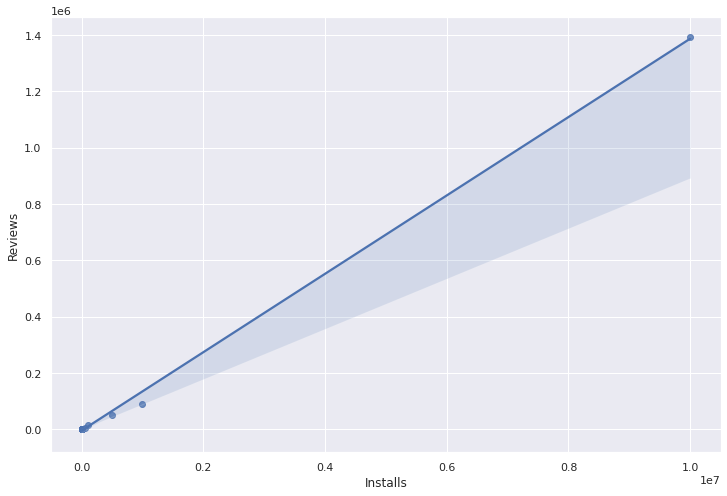

In [175]:
# Let's undestand relation of Installs and Reviews of App by Graphical Visualtization

# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                  #Giving height and width to the graph
insta_rev_paid_df['Installs']=insta_rev_paid_df['Installs'].astype(int)         #convert year data to integer type
sns.regplot(data=insta_rev_paid_df,x='Installs',y='Reviews')

3. Understand relation of **'Installs' and 'Rating' - Free Apps**

-----

In [176]:
free_insta_rate_df = free_app_df.groupby(['Installs'])['Rating'].mean().reset_index().sort_values(by=['Installs'], ascending=False)
free_insta_rate_df

,Installs,Rating
19,1.000000e+09,4.215000
18,5.000000e+08,4.375000
17,1.000000e+08,4.386243
16,5.000000e+07,4.333824
15,1.000000e+07,4.297315
14,5.000000e+06,4.227512
13,1.000000e+06,4.213796
12,5.000000e+05,4.161866
11,1.000000e+05,4.092248
10,5.000000e+04,4.025874


In [177]:
trend_lines = ["ols"]
for trend_line in trend_lines:
    fig = px.scatter(
        free_insta_rate_df, 
        x="Installs",
        y="Rating",
        trendline=trend_line,
        title=f"{trend_line} Trend Line"
    )
    fig.show()

4. Understand relation of **'Installs' and 'Rating' - Paid Apps**

-----

In [178]:
paid_insta_rate_df = paid_app_df.groupby(['Installs'])['Rating'].mean().reset_index().sort_values(by=['Installs'], ascending=False)
paid_insta_rate_df

,Installs,Rating
14,10000000.0,4.550000
13,1000000.0,4.445000
12,500000.0,4.418182
11,100000.0,4.462195
10,50000.0,4.327500
9,10000.0,4.303419
8,5000.0,4.107692
7,1000.0,4.153285
6,500.0,4.177500
5,100.0,4.244086


In [179]:
trend_lines = ["ols"]
for trend_line in trend_lines:
    fig = px.scatter(
        paid_insta_rate_df, 
        x="Installs",
        y="Rating",
        trendline=trend_line,
        title=f"{trend_line} Trend Line"
    )
    fig.show()